In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

(np.float64(-1.0), np.float64(1.0), np.float64(-1.0), np.float64(1.0))

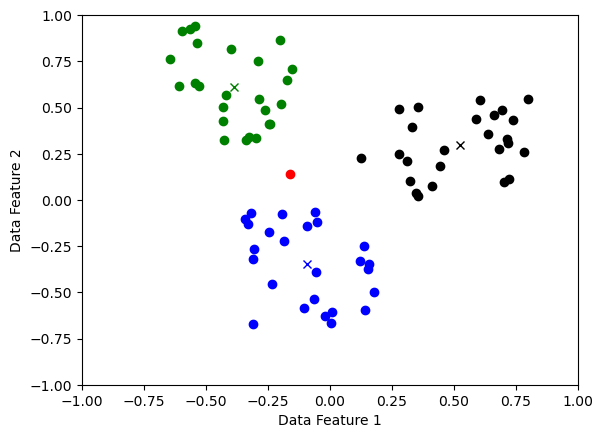

In [144]:
fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Get the data from the .csv file
data = pd.read_csv('kmeans_data.csv',usecols=['Feature 1', 'Feature 2', 'Class'])

# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

# This is the point we need to classify
y_p = 0.141
x_p = -0.161

# Finding the x-coords of the centroids
xgc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xbc = sum(blueData['Feature 1']) / len(blueData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])

# Finding the y-coords of the centroids
ygc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ybc = sum(blueData['Feature 2']) / len(blueData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

for point in zip(greenData['Feature 1'], greenData['Feature 2']):
    plt.plot(point[0], point[1], "go")

for point in zip(blueData['Feature 1'], blueData['Feature 2']):
    plt.plot(point[0], point[1], "bo")

for point in zip(blackData['Feature 1'], blackData['Feature 2']):
    plt.plot(point[0], point[1], "ko")

# Plotting the centroids
plt.plot(xgc, ygc, 'gx')
plt.plot(xbc, ybc, 'bx')
plt.plot(xkc, ykc, 'kx')

# Plotting the new data point
plt.plot(x_p, y_p, 'ro')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])

In [145]:
regA = QuantumRegister(3, 'regA')
regB = ClassicalRegister(1, 'regB')
qc = QuantumCircuit(regA, regB, name='qc')

{'0': 965, '1': 59}
{'0': 964, '1': 60}
{'0': 1006, '1': 18}
[965, 964, 1006]
According to our distance algorithm,the new data point belongs to the Blue class.

Euclidean distances:  [0.5202853247978458, 0.4905204028376394, 0.7014755294377703] 

According to euclidean distance calculations,the new data point belongs to the Blue class.


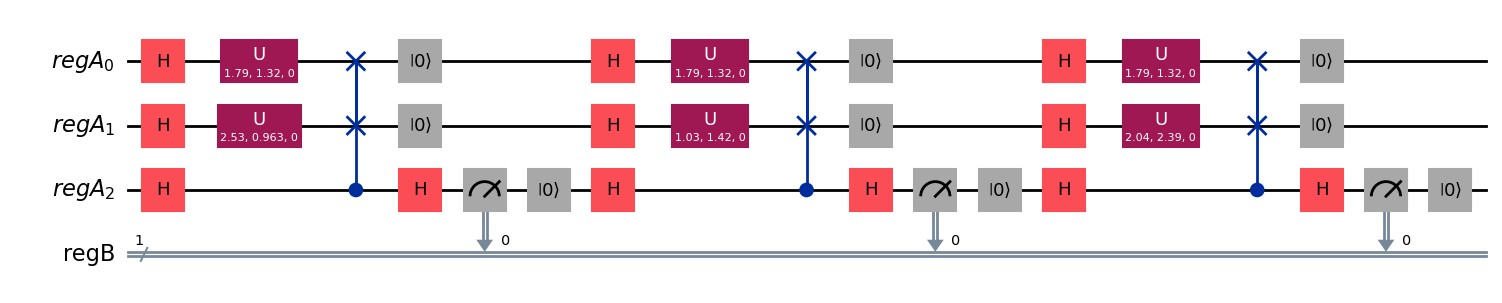

In [ ]:

phi_list = [((x + 1) * math.pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((y + 1) * math.pi / 2) for y in [y_p, ygc, ybc, ykc]]
simulator = AerSimulator()
results_list = []
for i in range(1, 4):
    qc.h(regA)

    # Encode new point and centroid
    qc.u(theta_list[0], phi_list[0], 0, regA[0])           
    qc.u(theta_list[i], phi_list[i], 0, regA[1]) 

    # Perform controlled swap
    qc.cswap(regA[2], regA[0], regA[1])
    # Apply second Hadamard to ancillary
    qc.h(regA[2])

    # Measure ancillary
    qc.measure(regA[2], regB[0])

    # Reset qubits:w

    qc.reset(regA)
    qc.barrier()

    # Register and execute job
    circ = transpile(qc, simulator)
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)
    print(counts)
    results_list.append(counts['1'])

print(results_list)

# Create a list to hold the possible classes
class_list = ['Green', 'Blue', 'Black']

# Find out which class the new data point belongs to 
# according to our distance estimation algorithm
quantum_p_class = class_list[results_list.index(max(results_list))]

# Find out which class the new data point belongs to 
# according to classical euclidean distance calculation
distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(xgc, ygc), (xbc, ybc), (xkc, ykc)]]
classical_p_class = class_list[distances_list.index(min(distances_list))]

# Print results
print("""According to our distance algorithm,the new data point belongs to the""", quantum_p_class, 'class.\n')
print('Euclidean distances: ', distances_list, '\n')
print("""According to euclidean distance calculations,the new data point belongs to the""", classical_p_class, 'class.')
qc.draw("mpl", plot_barriers=False)